In [2]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [7]:
import zipfile
import io
import imageio.v3 as iio

def read_dicom_from_zip(zip_filename, dicom_filename):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        with zip_ref.open(dicom_filename) as file:
            # Read the DICOM file from the zip as bytes
            dicom_bytes = file.read()
            # Create a BytesIO object from the bytes
            dicom_buffer = io.BytesIO(dicom_bytes)
            # Use imageio to read the DICOM file
            dicom_image = imageio.imread(dicom_buffer)
    return dicom_image

In [9]:
# exercise 01

"""
Load images

In this chapter, we'll work with sections of a computed tomography (CT) scan from The Cancer Imaging Archive. CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the imageio package to load a single DICOM image from the scan volume and check out a few of its attributes.
(https://en.wikipedia.org/wiki/CT_scan)
(http://www.cancerimagingarchive.net/about-the-cancer-imaging-archive-tcia/)
"""

# Instructions

"""

    Import imageio.
    Read in the image "chest-220.dcm" using the imread() function.
    Print the type() and shape (number of pixels) of im.

"""

# solution

# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = read_dicom_from_zip(path_data+'tcia-chest-ct-sample.zip', 'chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

#----------------------------------#

# Conclusion

"""
imageio is a versatile package. It can read in a variety of image data, including JPEG, PNG, and TIFF. But it's especially useful for its ability to handle DICOM files.
"""

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


/tmp/ipykernel_102167/4039983817.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  dicom_image = imageio.imread(dicom_buffer)


"\nimageio is a versatile package. It can read in a variety of image data, including JPEG, PNG, and TIFF. But it's especially useful for its ability to handle DICOM files.\n"

In [11]:
# exercise 02

"""
Metadata

ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

    Patient demographics: name, age, sex, clinical information
    Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)
(https://en.wikipedia.org/wiki/Medical_imaging#Imaging_modalities)
Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

After reading in the image, use im.meta to select the true statement from the list below.
"""

# Instructions

"""

    Read in the image, "chest-220.dcm".
    Print the available keys in the metadata dictionary. Use the the keys() method of im.meta.
---
Possible answers:
    
    'Modality' is 'MR'
    
    'sampling' is '(0.47, 0.47)'
    
    'PatientSex' is 'F' {Answer}
    
    'StudyDate' is '20120819'
"""

# solution

# Import ImageIO and load image
import imageio
#im = imageio.imread('chest-220.dcm')

# Print the available metadata fields
print(im.meta.keys())

# check key value
print(im.meta['PatientSex'])

#----------------------------------#

# Conclusion

"""
Great job! DICOM files have rich information related to patient and acquisition information, but other image formats can have helpful information as well.
"""

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
F 


'\nGreat job! DICOM files have rich information related to patient and acquisition information, but other image formats can have helpful information as well.\n'

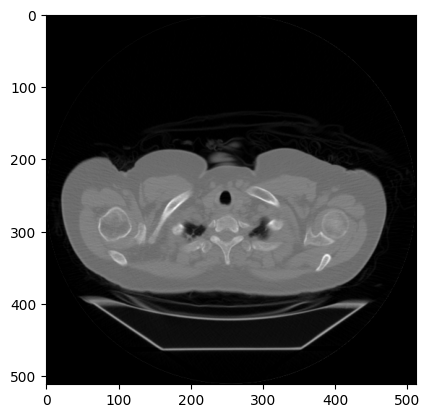

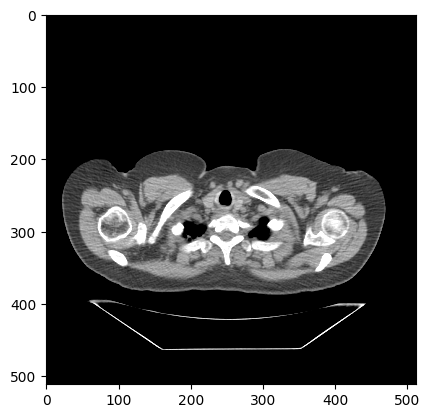

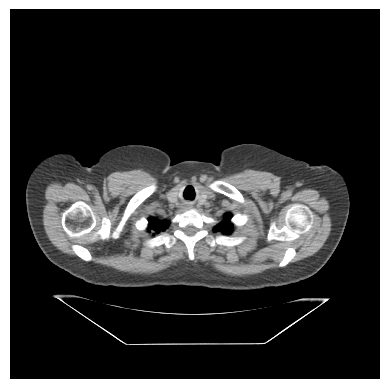

'\nNice work! Manipulating cmap, vmin, and vmax will give you the flexibility to plot all types of data. Remember, though, that they only affect the plot and not the underlying data.\n'

In [13]:
# exercise 03

"""
Plot images

Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's imshow() function gives you a simple way to do this. Knowing a few simple arguments will help:

    cmap controls the color mappings for each value. The "gray" colormap is common, but many others are available.
(https://matplotlib.org/users/colormaps.html)
    vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.
    plt.axis('off') removes axis and tick labels from the image.

For this exercise, plot the CT scan and investigate the effect of a few different parameters.
"""

# Instructions

"""

    Set the stage by importing packages and loading the CT scan. matplotlib.pyplot is often loaded as plt.
---

    Draw the image with plt.imshow(), selecting the "gray" colormap. Call plt.show() to render the image.
---

    Draw the image in grayscale. Also, set vmin=-200 and vmax=200 to increase the contrast (i.e., the distance between the brightest and darkest colors is smaller than before).
---

    Turn axis ticks and labels off.

"""

# solution

# Import ImageIO and PyPlot 
import imageio
import matplotlib.pyplot as plt

# Read in "chest-220.dcm"
#im = imageio.imread('chest-220.dcm')

#----------------------------------#

# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.show()

#----------------------------------#

# Draw the image with greater contrast
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)

# Render the image
plt.show()

#----------------------------------#
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)
# Remove axis ticks and labels
plt.axis('off')

# Render the image
plt.show()

#----------------------------------#

# Conclusion

"""
Nice work! Manipulating cmap, vmin, and vmax will give you the flexibility to plot all types of data. Remember, though, that they only affect the plot and not the underlying data.
"""

In [14]:
# exercise 04

"""
Stack images

Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

In this exercise, we will use NumPy's stack() function to combine several 2D arrays into a 3D volume. By convention, volumetric data should be stacked along the first dimension: vol[plane, row, col].
(http://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-images-coordinate-conventions)
Note: performing any operations on an ImageIO Image object will convert it to a numpy.ndarray, stripping its metadata.
"""

# Instructions

"""

    Import imageio and numpy (as np).
    Load "chest-220.dcm", "chest-221.dcm", and "chest-222.dcm".
    Create a 3D volume using np.stack(). Set the stacking axis to 0.
    Print the shape attribute of vol.

"""

# solution

# Import ImageIO and NumPy
import imageio
import numpy as np

# Read in each 2D image
#im1 = imageio.imread('chest-220.dcm')
im1 = im
#im2 = imageio.imread('chest-221.dcm')
im2 = read_dicom_from_zip(path_data+'tcia-chest-ct-sample.zip', 'chest-221.dcm')
#im3 = imageio.imread('chest-222.dcm')
im3 = read_dicom_from_zip(path_data+'tcia-chest-ct-sample.zip', 'chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)
print('Volume dimensions:', vol.shape)

#----------------------------------#

# Conclusion

"""
Great work! For large volumes, you can use a for loop to quickly generate your image list.
"""

Volume dimensions: (3, 512, 512)


/tmp/ipykernel_102167/4039983817.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  dicom_image = imageio.imread(dicom_buffer)


'\nGreat work! For large volumes, you can use a for loop to quickly generate your image list.\n'

In [32]:
# exercise 05

"""
Load volumes

ImageIO's volread() function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

For this exercise, read in an entire volume of brain data from the "tcia-chest-ct" folder, which contains 25 DICOM images.
"""

# Instructions

"""

    Use volread() to load the directory, "tcia-chest-ct".
    Print the available metadata using the keys() method of vol.meta.
    Print the shape of the volume.

"""

# solution

# Import ImageIO
import imageio

# Load the "tcia-chest-ct" directory
vol = imageio.volread(path_data+'tcia-chest-ct-sample', plugin='dicom')

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

#----------------------------------#

# Conclusion

"""
Well done. Using volread() to load image volumes can be faster and more reliable than loading them in image-by-image. It also preserves image metadata where possible.
"""

ValueError: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`

In [5]:
# exercise 06

"""
Field of view

The amount of physical space covered by an image is its field of view, which is calculated from two properties:

    Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.
    Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).

For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of vol. All values are in millimeters.
"""

# Instructions

"""
Possible answers:
    
    (25, 512, 512)
    
    (50, 1024, 1024)
    
    (82, 500, 500) {Answer}
    
    (3.27, 0.97, 0.97)

"""

# solution
import numpy as np
np.array(vol.meta['sampling']) * np.array(vol.shape)

#----------------------------------#

# Conclusion

"""
Great job! You should always investigate your image's metadata to get a complete understanding of its origins.
"""

'\n\n'

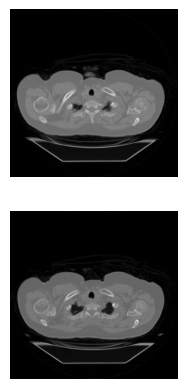

'\nGreat work! For even more rapid visualization, you can use a large number of subplots and loop through your axes and images.\n'

In [33]:
# exercise 07

"""
Generate subplots

You can draw multiple images in one figure to explore data quickly. Use plt.subplots() to generate an array of subplots.

fig, axes = plt.subplots(nrows=2, ncols=2)

To draw an image on a subplot, call the plotting method directly from the subplot object rather than through PyPlot: axes[0,0].imshow(im) rather than plt.imshow(im).

For this exercise, draw im1 and im2 on separate subplots within the same figure.
"""

# Instructions

"""

    Create a subplots grid where nrows=2 and ncols=1.
    Draw im1 and im2 on the first and second subplots respectively. Use a "gray" colormap for each.
    For each subplot, turn off the axis ticks and labels.
    Render the figure.

"""

# solution

# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(2,1)

# Draw an image on each subplot
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')

# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
plt.show()

#----------------------------------#

# Conclusion

"""
Great work! For even more rapid visualization, you can use a large number of subplots and loop through your axes and images.
"""

In [7]:
# exercise 08

"""
Slice 3D images

The simplest way to plot 3D and 4D images by slicing them into many 2D frames. Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.

To select a 2D frame, pick a frame for the first axis and select all data from the remaining two: vol[0, :, :]

For this exercise, use for loop to plot every 40th slice of vol on a separate subplot. matplotlib.pyplot (as plt) has been imported for you.
"""

# Instructions

"""

    Using plt.subplots(), initialize a subplots grid with 1 row and 4 columns.
    Plot every 40th slice of vol in grayscale. To get the appropriate index, multiply ii by 40.
    Turn off the ticks, labels, and frame for each subplot.
    Render the figure.

"""

# solution

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1, ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii * 40, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')

# Render the figure
plt.show()

#----------------------------------#

# Conclusion

"""
When selecting frames, any trailing : symbols are implicitly selected. For example, vol[5] is the same as vol[5,:,:]. We will follow this simpler convention moving forward.
"""

'\n\n'

In [8]:
# exercise 09

"""
Plot other views

Any two dimensions of an array can form an image, and slicing along different axes can provide a useful perspective. However, unequal sampling rates can create distorted images.

Changing the aspect ratio can address this by increasing the width of one of the dimensions.

For this exercise, plot images that slice along the second and third dimensions of vol. Explicitly set the aspect ratio to generate undistorted images.
"""

# Instructions

"""

    Slice a 2D plane from vol where "axis 1" is 256.
    Slice a 2D plane from vol where "axis 2" is 256.
    For each image, calculate the aspect ratio by dividing the image "sampling" rate for axis 0 by its opponent axis. This information is in vol.meta.
    Plot the images in a subplots array. Specify the aspect ratio for each image, and set cmap='gray'.

"""

# solution

# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)
plt.show()

#----------------------------------#

# Conclusion

"""
Great work in this chapter! Next, we'll begin to manipulate images and extract salient features from them.
"""

'\n\n'